# Henry's work

Testin the new training data while not dataset split

In [3]:
import numpy as np
import pandas as pd
import datetime
from sklearn.base import TransformerMixin
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.externals import joblib

Initialize the output format and the output key dictionary


In the follow cell, will using the keyword traning set to explore the accurcy improvement

In [12]:
np.random.seed(1)

# useing different keyword
# TRAINING_FILE = "training.csv"
TRAINING_FILE = "keyword.csv"
TEST_FILE = "key_word_test.csv"
time_format = '%Y-%m-%d*%H:%M:%S'

x_label = 'key_word_50'
# x_label = 'key_word_100'
# x_label = 'topic'

topic_code = {
    'ARTS CULTURE ENTERTAINMENT': 1,
    'BIOGRAPHIES PERSONALITIES PEOPLE': 2,
    'DEFENCE': 3,
    'DOMESTIC MARKETS': 4,
    'FOREX MARKETS': 5,
    'HEALTH': 6,
    'MONEY MARKETS': 7,
    'SCIENCE AND TECHNOLOGY': 8,
    'SHARE LISTINGS': 9,
    'SPORTS': 10,
    'IRRELEVANT': 0
}

### Try to implement with key word

In [13]:
def preprocess(df):
    df['topic_code'] = df['topic'].apply(lambda x: topic_code[x])

    return df[['article_words', 'topic_code', 'key_word_50', 'key_word_100', 'topic']]

def bag_of_word(train_set, test_set, model, label_model):
    vector = model
    train_x = vector.transform(train_set[x_label].values)
    train_y = label_model.transform(train_set['topic'])
    test_x = vector.transform(test_set[x_label].values)
    test_y = label_model.transform(test_set['topic'])

    return train_x, train_y, test_x, test_y

def convert_word(bag_of_word_model, label_model, data_set):
    act_x = bag_of_word_model.transform(data_set[x_label].values)
    act_y = label_model.transform(data_set['topic'])

    return act_x, act_y

## Main program part, pre-processing in model

In [14]:
# load data from file
df = pd.read_csv(TRAINING_FILE)

# pre process the y
df = preprocess(df)

# split the data
#train_set, test_set = train_test_split(df, test_size=0.1)

# Using different model to convert word
vector_model = TfidfVectorizer().fit(df[x_label])
label_model = preprocessing.LabelEncoder().fit(df['topic'])
#train_x, train_y, test_x, test_y = bag_of_word(train_set, test_set, CountVectorizer().fit(df['article_words']))
#train_x, train_y, test_x, test_y = bag_of_word(train_set, test_set, vector_model, label_model)
#train_x, train_y, test_x, test_y = bag_of_word(train_set, test_set, HashingVectorizer())

train_x, train_y = convert_word(vector_model, label_model, df)

print('Training set size:', train_x.shape)
# print('Test set size:', test_x.shape)

Training set size: (9500, 487)


### using pervious result to first detected the result of model

---
pervious is when min_samples_leaf equal to 29 can get the best AUC

In [15]:
%%time

# train
test_record = []

dtc = DecisionTreeClassifier(min_samples_leaf=29)
dtc.fit(train_x, train_y)

print("The accuracy of Training set is:", dtc.score(train_x, train_y))
#print("The accuracy of Test set is:", dtc.score(test_x, test_y))

The accuracy of Training set is: 0.7643157894736842
CPU times: user 867 ms, sys: 4.2 ms, total: 871 ms
Wall time: 871 ms


In [16]:
predict_proba = dtc.predict_proba(train_x)
auc = roc_auc_score(train_y, predict_proba, multi_class='ovr')
print("Current auc is:", auc)

Current auc is: 0.9669437250549634


## Try to implement in a range

in the range between 21-50

fiting with leaf value = 1 ......Done!
fiting with leaf value = 2 ......Done!
fiting with leaf value = 3 ......Done!
fiting with leaf value = 4 ......Done!
fiting with leaf value = 5 ......Done!
fiting with leaf value = 6 ......Done!
fiting with leaf value = 7 ......Done!
fiting with leaf value = 8 ......Done!
fiting with leaf value = 9 ......Done!
fiting with leaf value = 10 ......Done!
fiting with leaf value = 11 ......Done!
fiting with leaf value = 12 ......Done!
fiting with leaf value = 13 ......Done!
fiting with leaf value = 14 ......Done!
fiting with leaf value = 15 ......Done!
fiting with leaf value = 16 ......Done!
fiting with leaf value = 17 ......Done!
fiting with leaf value = 18 ......Done!
fiting with leaf value = 19 ......Done!
fiting with leaf value = 20 ......Done!
fiting with leaf value = 21 ......Done!
fiting with leaf value = 22 ......Done!
fiting with leaf value = 23 ......Done!
fiting with leaf value = 24 ......Done!
fiting with leaf value = 25 ......Done!
fiting wi

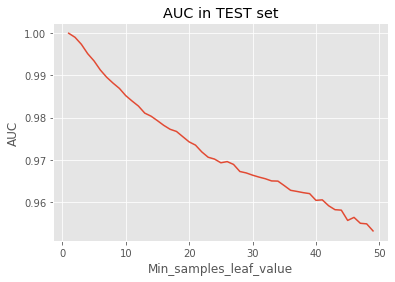

In [17]:
test_record = []
best_model = None

min_samples_leaf_value = 0
max_auc = 0
leaf_value_range = range(1, 30)
for leaf_value in leaf_value_range:
    print("\rfiting with leaf value = {} ...... ".format(leaf_value), end="")
    model = DecisionTreeClassifier(min_samples_leaf=leaf_value)
    model.fit(train_x, train_y)
    
    print("Done!")

    prediction = model.predict_proba(train_x)
    auc = roc_auc_score(train_y, prediction, multi_class='ovr')
    test_record.append(auc)

    if auc > max_auc:
        max_auc = auc
        min_samples_leaf_value = leaf_value
        best_model = model

print("The optimal number of min_samples_leaf by TEST set is:", min_samples_leaf_value)
print("With max AUC by TEST is:", max_auc)
print("The accuracy of BEST model in Training set is:", best_model.score(train_x, train_y))
#print("The accuracy of BEST model in Test set is:", best_model.score(test_x, test_y))

plt.style.use('ggplot')
# fig = plt.figure(figsize=(12, 6))
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(leaf_value_range, test_record)
ax1.set_title('AUC in TEST set')
ax1.set_xlabel('Min_samples_leaf_value')
ax1.set_ylabel('AUC')

plt.show()

## Using the best model found in pervious range to check the result

### Define the evulate function

In [24]:

def topic_score(model, data_set, topic_name):
    test_data_set = data_set[data_set['topic'] == topic_name]
    test_x, test_y = convert_word(vector_model, label_model, test_data_set)
    pred_y = model.predict(test_x)

    f1_score = metrics.f1_score(test_y, pred_y, average='macro')
    accuarcy = metrics.accuracy_score(test_y, pred_y)
    recall_score = metrics.recall_score(test_y, pred_y, average='macro')

    return f1_score, accuarcy, recall_score



In [27]:
print('Topic\tf1\taccuarcy\trecall_score')
report = []
for topic in topic_code.keys():
    result = topic_score(best_model, df, topic)
    # print(topic,'\t',result[0],'\t',result[1],'\t',result[2],'\t')
    report.append(result)

report.sort(reverse=)

Topic	f1	accuarcy	recall_score
ARTS CULTURE ENTERTAINMENT 	 1.0 	 1.0 	 1.0 	
BIOGRAPHIES PERSONALITIES PEOPLE 	 0.4984984984984985 	 0.9940119760479041 	 0.49700598802395207 	
DEFENCE 	 1.0 	 1.0 	 1.0 	
DOMESTIC MARKETS 	 1.0 	 1.0 	 1.0 	
FOREX MARKETS 	 0.4931013797240552 	 0.9727810650887574 	 0.4863905325443787 	
HEALTH 	 1.0 	 1.0 	 1.0 	
MONEY MARKETS 	 0.3243298547165951 	 0.9473998804542738 	 0.3157999601514246 	
SCIENCE AND TECHNOLOGY 	 1.0 	 1.0 	 1.0 	
SHARE LISTINGS 	 0.4976958525345622 	 0.9908256880733946 	 0.4954128440366973 	
SPORTS 	 0.3325754130665454 	 0.9954627949183303 	 0.33182093163944343 	
IRRELEVANT 	 0.24957680914092256 	 0.9966201943388255 	 0.24915504858470638 	


## For test set

In [28]:
print('Topic\tf1\taccuarcy\trecall_score')
test_report = []

test_df = pd.read_csv(TEST_FILE)
test_df = preprocess(test_df)
for topic in topic_code.keys():
    result = topic_score(best_model, test_df, topic)
    # print(topic,'\t',result[0],'\t',result[1],'\t',result[2],'\t')
    test_report.append(result)

Topic	f1	accuarcy	recall_score
ARTS CULTURE ENTERTAINMENT 	 1.0 	 1.0 	 1.0 	
BIOGRAPHIES PERSONALITIES PEOPLE 	 0.0392156862745098 	 0.13333333333333333 	 0.022222222222222223 	
DEFENCE 	 0.253968253968254 	 0.6153846153846154 	 0.20512820512820515 	
DOMESTIC MARKETS 	 0.3333333333333333 	 0.5 	 0.25 	
FOREX MARKETS 	 0.2028985507246377 	 0.4375 	 0.14583333333333334 	
HEALTH 	 0.15 	 0.42857142857142855 	 0.10714285714285714 	
MONEY MARKETS 	 0.2484848484848485 	 0.5942028985507246 	 0.19806763285024154 	
SCIENCE AND TECHNOLOGY 	 0.16666666666666666 	 0.3333333333333333 	 0.1111111111111111 	
SHARE LISTINGS 	 0.14814814814814817 	 0.2857142857142857 	 0.09523809523809523 	
SPORTS 	 0.45454545454545453 	 0.8333333333333334 	 0.4166666666666667 	
IRRELEVANT 	 0.08870292887029288 	 0.7969924812030075 	 0.07969924812030074 	


## Save model

In [ ]:
joblib.dump(best_model, )